# Data
- https://www.kaggle.com/datasets/yassinehamdaoui1/cardiovascular-disease/data
# Documentación
- https://journals.co.za/doi/pdf/10.10520/AJA20785135_9894 # Paper del estudio
- https://great-northern-diver.github.io/loon.data/reference/SAheart.html # Contexto y Descripción variables
- https://www.thedtic.gov.za/wp-content/uploads/who_presentation.pdf
- Peso cigarrillo: https://cancer-code-europe.iarc.fr/index.php/es/doce-formas/tabaco/263-tabaco-cuadro/672-cuadro-1-tipos-de-tabaco#:~:text=Cada%20cigarrillo%20contiene%20aproximadamente%201,y%201%20mg%20de%20nicotina.&text=Fuente%3A%20graurcodrin%2FFreeDigitalPhotos.net%20(Imagen%20cedida).




sbp
Systolic blood pressure in millimetres of mercury (mm Hg).

tobacco
Cumulative tobacco use in kilograms. Appears to be lifetime cumulative; not annual.

ldl
Low density lipoprotein cholesterol ("bad cholesterol")

adiposity
Not recorded in source; presumably another measurement of obesity similar to BMI. Possibly a "corrected" version of obesity measure.

famhist
Factor indicating presence or absence of a family history of ischaemic heart disease.

typea
Type-A coronary prone personality behaviour as measured by a self-administered Bortner Short Rating Scale. Possible total scores can range from 12 to 84. Rossouw et al. (1983) "arbitrarily" classify those with scores of 55 or more "as exhibiting type A behaviour."

obesity
A measure of obesity; body mass index (or BMI) is consistent with Rossouw et al. (1983). Having BMI >= 30 scored as "obese" by Rossouw et al. (1983).

alcohol
Current alcohol consumption. Units of measurement (quantity/time) are unclear (e.g litres per annum, ounces per month?); alcohol not mentioned in Rossouw et al. (1983).

age
Age in years at time of study (Source web page: `Age at onset'.)

chd
The response, a factor identifying whether the subject had been diagnosed as having coronary heart disease or not.

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [150]:
df = pd.read_csv('cardiovascular.csv', delimiter=';')
df

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [151]:
# Tipo de datos del conjunto
df.dtypes

ind            int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [152]:
# Métricas estadísticas de los datos numéricos
df.describe()

,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [153]:
# información genral de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


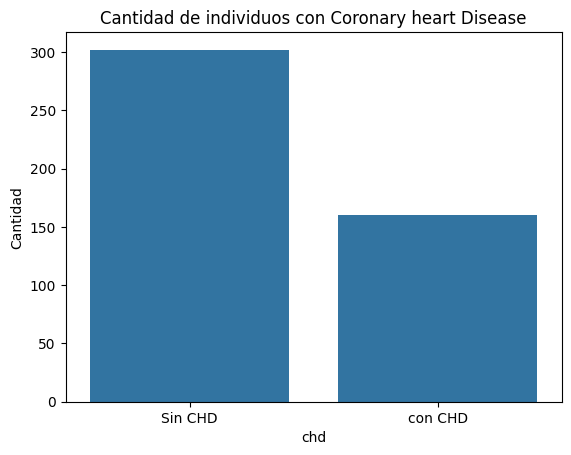

In [154]:
# Cantidad de individuos con enfermedad coronaria (chd) de la muestra
sns.countplot(data=df, x='chd')
plt.title('Cantidad de individuos con Coronary heart Disease')
plt.xticks([0,1],['Sin CHD', 'con CHD'])
plt.ylabel("Cantidad")
plt.show()

In [155]:
# No se observan valores nulos en el conjunto de datos
df.isnull().sum()

ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [156]:
# ind: eliminar el id porque no tiene informacion
df = df.drop(['ind'],axis=1)

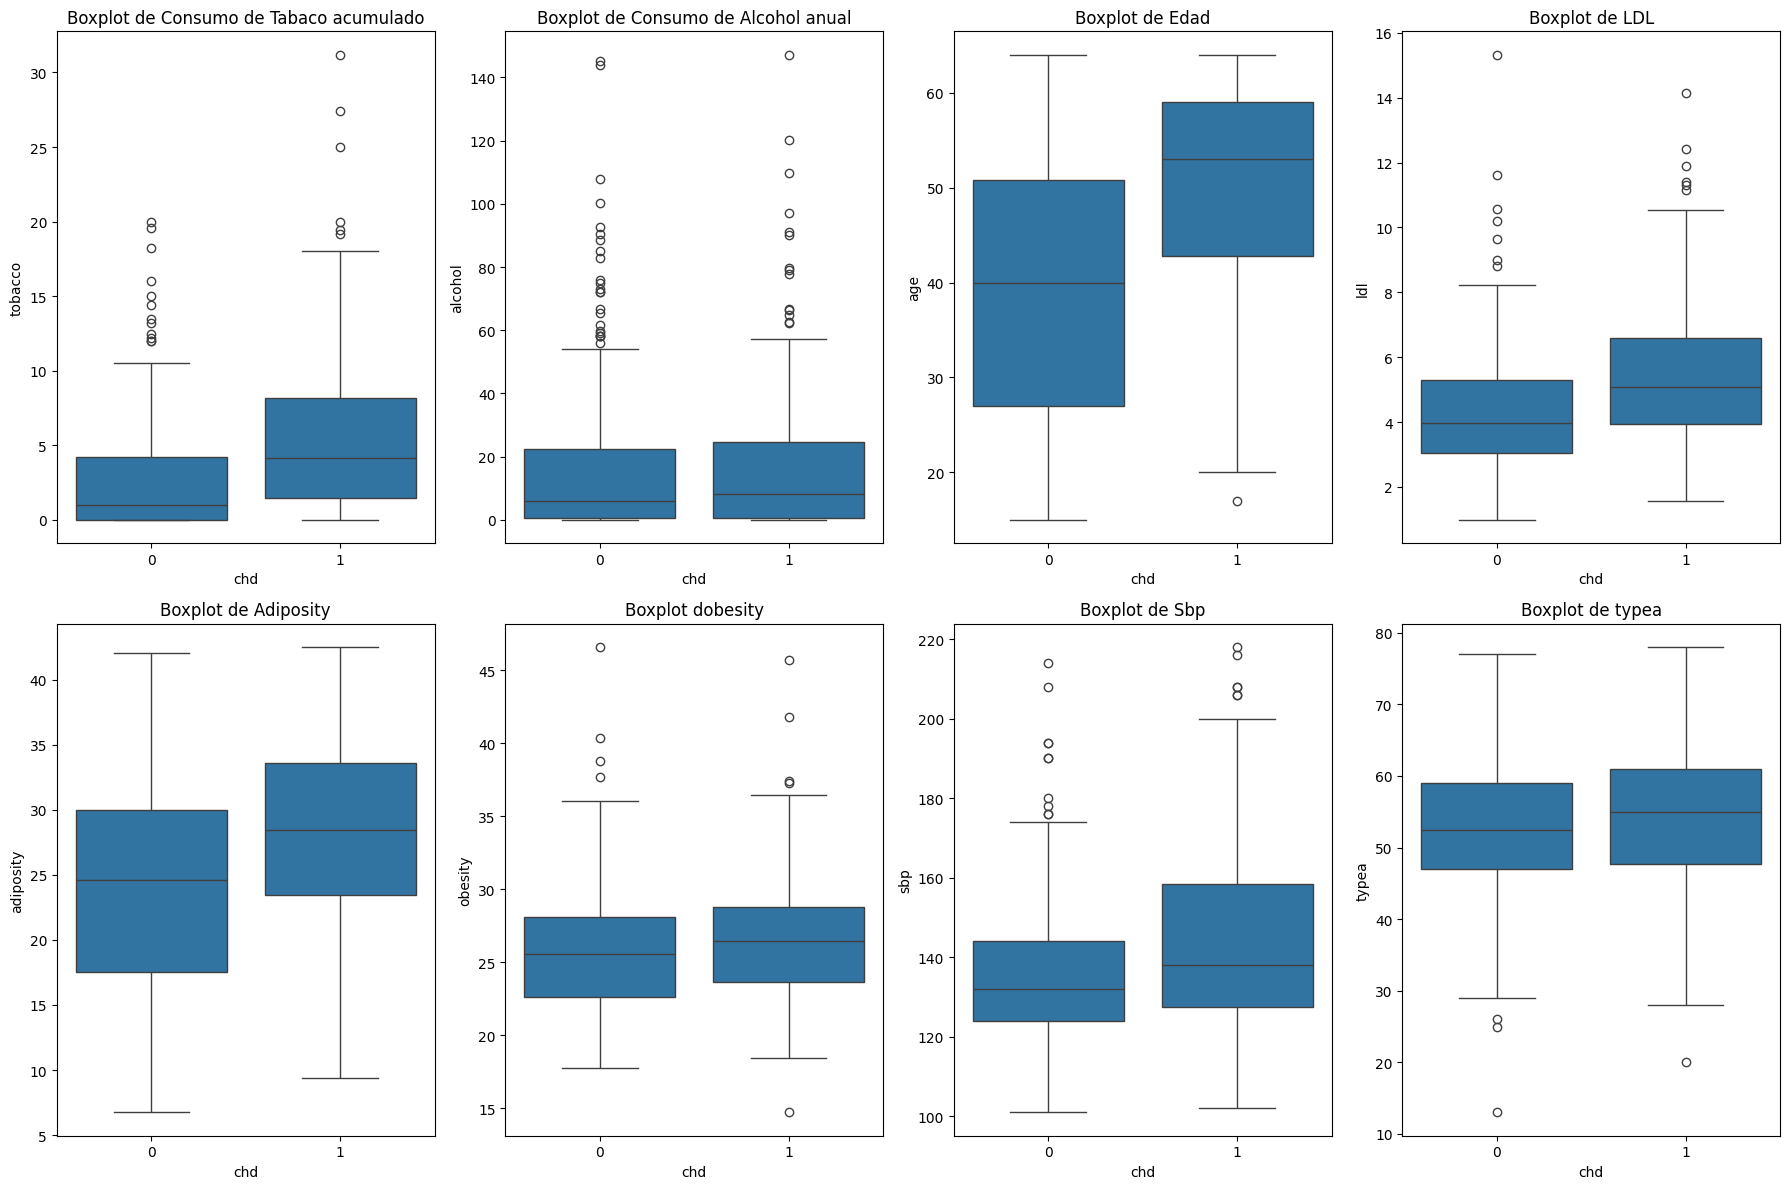

In [157]:
# Boxplot de variables numéricas de interés para la identificación de outliers
fig, ax = plt.subplots(2, 4, figsize=(18, 12))

# Boxplot de tobacco
sns.boxplot(x='chd', y='tobacco', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Boxplot de Consumo de Tabaco acumulado')

# Boxplot de alcohol
sns.boxplot(x='chd', y='alcohol', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Boxplot de Consumo de Alcohol anual')

# Boxplot de age
sns.boxplot(x='chd', y='age', data=df, ax=ax[0, 2])
ax[0, 2].set_title('Boxplot de Edad')

# Boxplot de ldl
sns.boxplot(x='chd', y='ldl', data=df, ax=ax[0, 3])
ax[0, 3].set_title('Boxplot de LDL')

# Boxplot de adiposity
sns.boxplot(x='chd', y='adiposity', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Boxplot de Adiposity')

# Boxplot de obesity
sns.boxplot(x='chd', y='obesity', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Boxplot dobesity')

# Boxplot de sbp
sns.boxplot(x='chd', y='sbp', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Boxplot de Sbp')

# Boxplot de typea
sns.boxplot(x='chd', y='typea', data=df, ax=ax[1, 3])
ax[1, 3].set_title('Boxplot de typea')

plt.tight_layout()
plt.show()

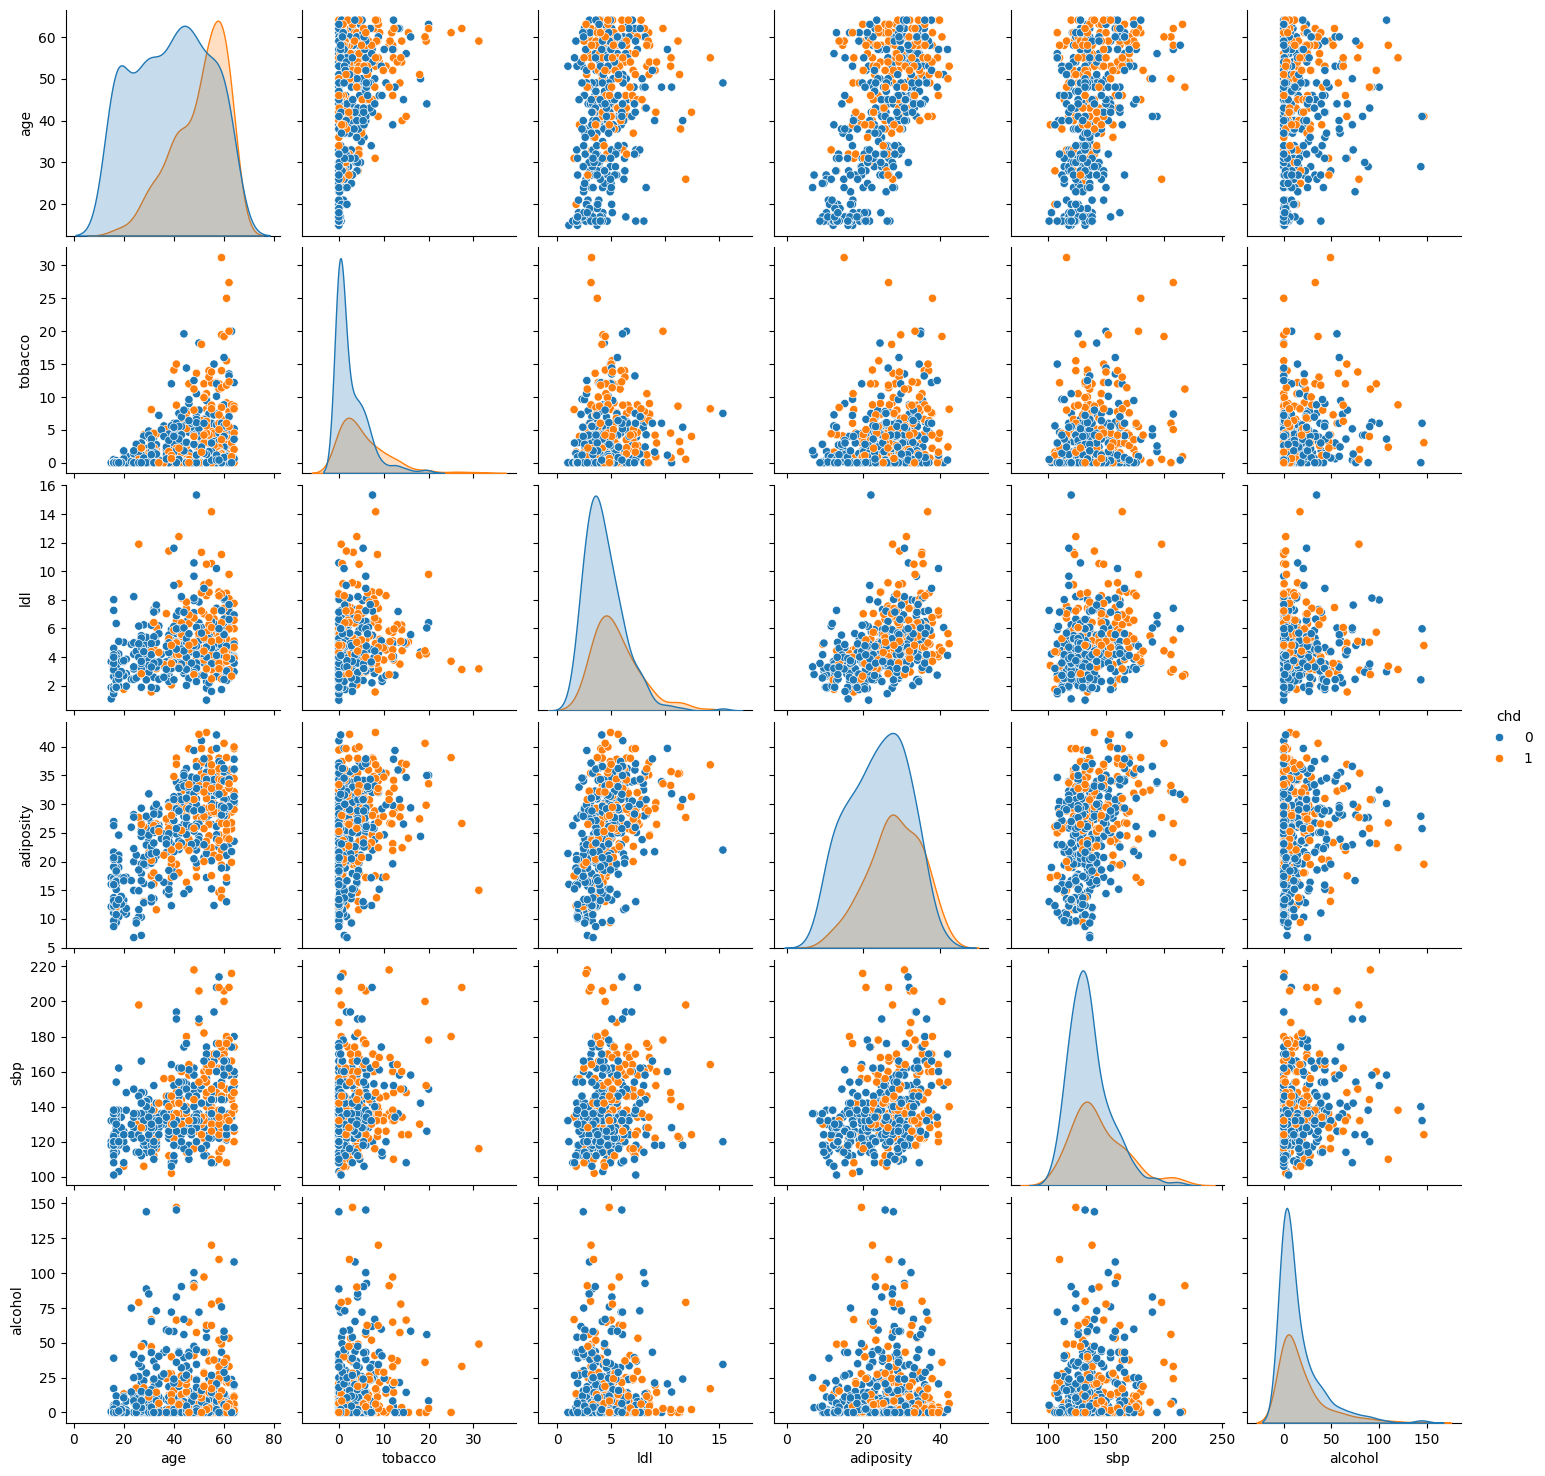

In [158]:
# Visualización de la distribución de las variables
sns.pairplot(df[['age', 'tobacco', 'ldl', 'adiposity', 'sbp', 'alcohol', 'chd']], hue='chd')
plt.show()

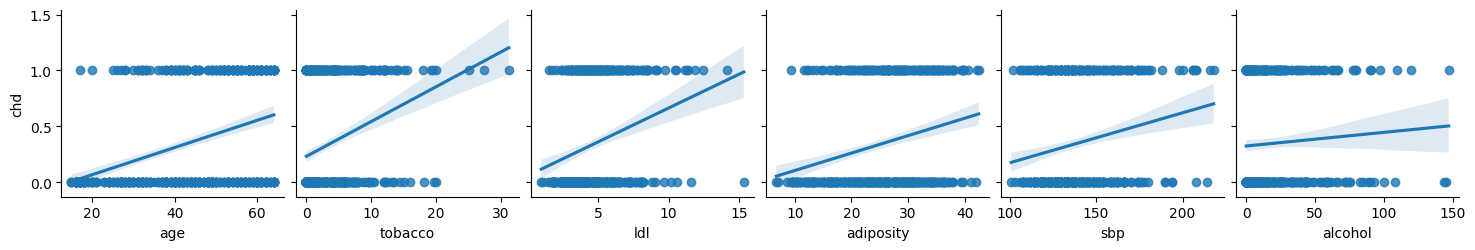

In [159]:
# Visualización de la linealidad mediante gráficos de dispersión
sns.pairplot(df, x_vars=['age', 'tobacco', 'ldl', 'adiposity', 'sbp', 'alcohol'], y_vars='chd', kind='reg')
plt.show()

Text(0.5, 1.0, 'Distribución de sbp')

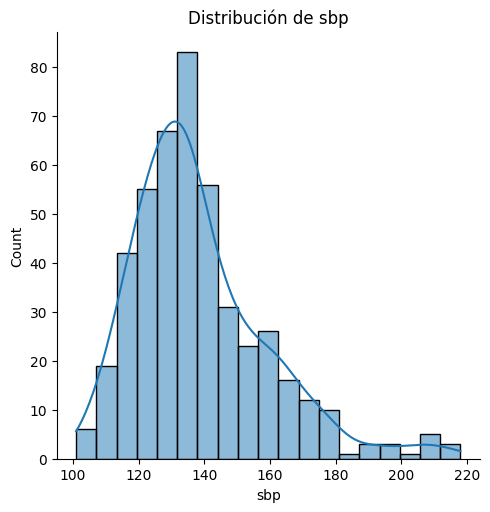

In [160]:
# Distribución de sbp
sns.displot(data=df, x='sbp', kde=True)
plt.title('Distribución de sbp')

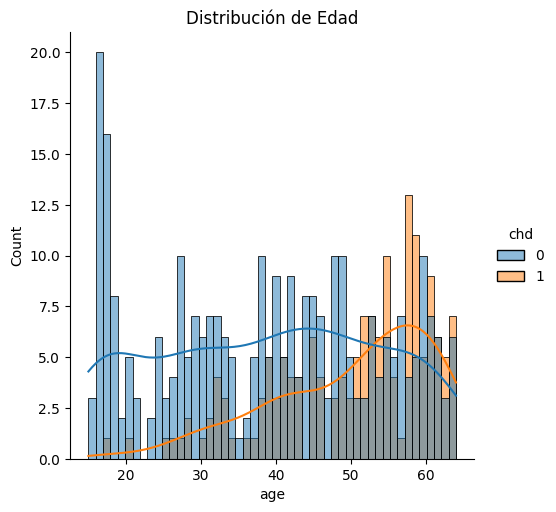

In [161]:
# Distribución de edades
sns.displot(data=df, x='age', kde=True, bins=50, hue='chd')
plt.title('Distribución de Edad')
plt.show()

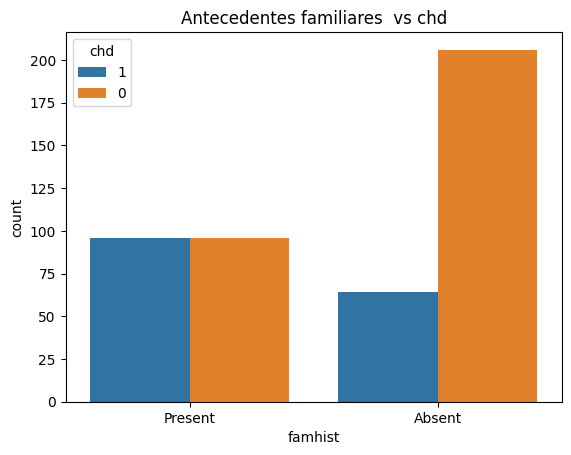

In [162]:
# Antecedentes familiares vs enfermedad coronaria
sns.countplot(data= df.astype(str), x='famhist', hue="chd")
plt.title('Antecedentes familiares  vs chd')
plt.show()

In [163]:
# División del df entre variables numéricas y categóricas
df_num = df.select_dtypes(['int', 'float'])
df_cat = df.select_dtypes('object')


In [164]:
# Escalamos tabaco a misma unidad de medida: Cogemos la edad - 15 porque vemos que no hay ningún fumador con 15 años, consideramo que los de 16 llevan minimo un año fumando, por lo que el consumo seria tabaco fumando acumulado dividido por años fumando , donde años fumando es edad menos 15.
# Aplicamos la fórmula sólo a los mayores de 15, sino devolvemos "0"
df_num['tabaco_anual'] = df_num.apply(lambda fila: 0 if fila['age'] < 16 else (fila["tobacco"]/(fila["age"]-15)), axis=1)
df_num['tabaco_anual'].isnull().sum()

0

In [165]:
df_num.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,tabaco_anual
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354,0.098621
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718,0.892088
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053,0.109840
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121,0.133857
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156,0.042924
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095,0.054048
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531,0.231591
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973,0.221714
chd,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000,0.228753
tabaco_anual,0.098621,0.892088,0.109840,0.133857,0.042924,0.054048,0.231591,0.221714,0.228753,1.000000


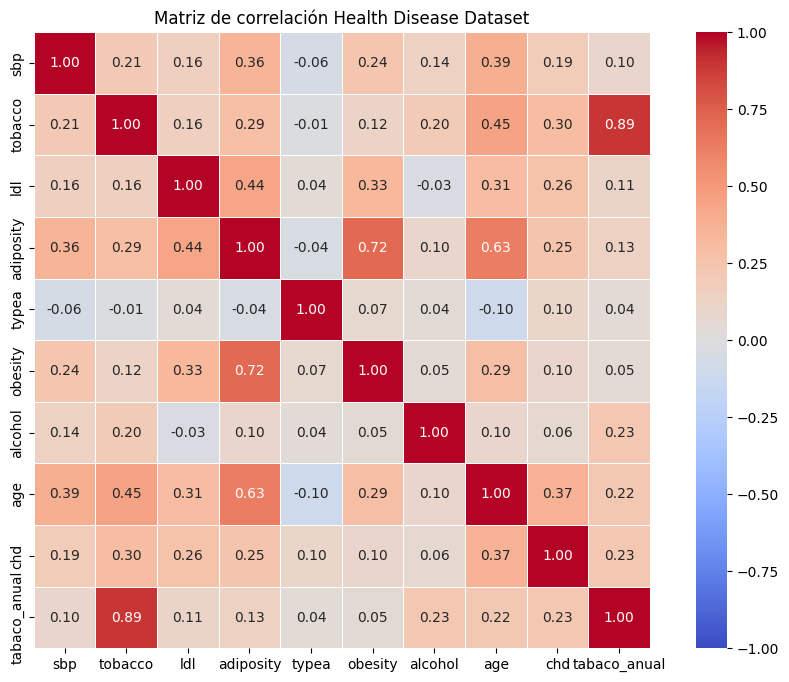

In [166]:
plt.figure(figsize=(12, 8))  # Aseguramos un tamaño adecuado para que todo quepa en una figura
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f',
            linewidths=.5, annot_kws={"size": 10})
plt.title('Matriz de correlación Health Disease Dataset')
plt.show()

In [167]:
# df_num_cleaned = df_num.copy()


# # Limpieza de outliers en df_num quedándonos sólo con el rango IQR 25/75 en df_num_cleaned
# for columna in df_num.columns:
#     # Calcular percentiles
#     seventy_fifth = df_num[columna].quantile(0.75)
#     twenty_fifth = df_num[columna].quantile(0.25)

#     # Obtener iqr
#     iqr = seventy_fifth - twenty_fifth

#     # Umbrales superiores e inferiores
#     upper = seventy_fifth + (1.5 * iqr)
#     lower = twenty_fifth - (1.5 * iqr)

#     # Filtrar df_num para quedarnos con iqr
#     df_num_cleaned = df_num_cleaned[(df_num_cleaned[columna] >= lower) & (df_num_cleaned[columna] <= upper)]

# # Verificar el resultado
# print(df_num_cleaned)

In [168]:
# # Correlación entre variables numéricas y variable objetivo "chd" ANTES de la limpieza (Corr Original) y después (corr Cleaned)
# df_num_corr = df_num.corr()['chd'].sort_values(ascending=False)
# df_num_cleaned_corr = df_num_cleaned.corr()['chd'].sort_values(ascending=False)


# # Combina las correlaciones en un DataFrame
# combined_corr = pd.DataFrame({
#     'Corr Original': df_num_cleaned_corr,
#     'Corr Cleaned': df_num_corr
# })

# # Calcula la diferencia y agrega como una nueva columna
# combined_corr['Diff'] = combined_corr['Corr Cleaned'] - combined_corr['Corr Original']

# # Imprime el DataFrame resultante
# print(combined_corr)

In [169]:
df_num_corr = df_num.corr()['chd'].sort_values(ascending=False)
df_num_corr

chd             1.000000
age             0.372973
tobacco         0.299718
ldl             0.263053
adiposity       0.254121
tabaco_anual    0.228753
sbp             0.192354
typea           0.103156
obesity         0.100095
alcohol         0.062531
Name: chd, dtype: float64

In [170]:
# # Boxplot de variables numéricas de interés CLEANED después de la limpieza de outliers
# fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# # Boxplot de tobacco
# sns.boxplot(y='tobacco', data=df_num_cleaned, ax=ax[0, 0])
# ax[0, 0].set_title('Boxplot de Consumo de Tabaco acumulado')

# # Boxplot de alcohol
# sns.boxplot(y='alcohol', data=df_num_cleaned, ax=ax[0, 1])
# ax[0, 1].set_title('Boxplot de Consumo de Alcohol anual')

# # Boxplot de age
# sns.boxplot(y='age', data=df_num_cleaned, ax=ax[0, 2])
# ax[0, 2].set_title('Boxplot de Edad')

# # Boxplot de ldl
# sns.boxplot(y='ldl', data=df_num_cleaned, ax=ax[1, 0])
# ax[1, 0].set_title('Boxplot de LDL')

# # Boxplot de adiposity
# sns.boxplot(y='adiposity', data=df_num_cleaned, ax=ax[1, 1])
# ax[1, 1].set_title('Boxplot de Adiposity')

# # Boxplot de sbp
# sns.boxplot(y='sbp', data=df_num_cleaned, ax=ax[1, 2])
# ax[1, 2].set_title('Boxplot de Sbp')

# plt.tight_layout()
# plt.show()

In [171]:
# # Cantidad de individuos con enfermedad coronaria (chd) de la muestra
# sns.countplot(data=df_num_cleaned, x='chd')
# plt.title('Cantidad de individuos con Coronary heart Disease')
# plt.xticks([0,1],['Sin CHD', 'con CHD'])
# plt.ylabel("Cantidad")
# plt.show()

In [172]:
df['chd'].value_counts()/df.shape[0]*100

chd
0    65.367965
1    34.632035
Name: count, dtype: float64

In [173]:
# df_num_cleaned['chd'].value_counts()/df_num_cleaned.shape[0]*100

In [174]:
# - 1 Hace falta usar ANOVA para acabar de identificar las features de interés o es suficiente con la correlación + boxplots?
# - Utilizar un modelo no paramétrico (árbol de decisión/RandomForest) para evitar influencia valores atípicos??? Pero pocos datos!
# - 2 Datos desbalanceados y escasos -> SMOTE con Kmeans para aumentar muestras (minority) o oversampling (riesgo overfitting)? Hacer antes de probar modelos?
# - 3 Es necesario dividir por meses si usamos SatandardScaler() ??
# - 4 Onehotenconding de famhist (o sólo map?)
# - 5 Vamos probando modelo tras modelo o todos a la vez en una función? Combinación de modelos (stacking)?

In [175]:
# ## ANOVA para evaluar incidencia variables sobre chd

# from sklearn.feature_selection import f_classif
# # Convertir las variables categóricas a numéricas
# # df_num['famhist'] = df['famhist'].apply(lambda x: 1 if x == 'Present' else 0)

# # Seleccionar las características y la variable objetivo
# X = df_num[['age', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'sbp', 'obesity', 'alcohol', 'tabaco_anual']] # Falta convertir famhist!!
# y = df['chd']

# # Aplicar ANOVA F-test
# F, p = f_classif(X, y)

# # Crear un DataFrame con los resultados
# anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': F, 'p-value': p})
# anova_results = anova_results.sort_values(by='F-Score', ascending=False)

# print(anova_results)

In [176]:
# age, famhist, ldl, adiposity, tabaco_anual, sbp
# Alcohol y Typea : Poca relación
# Obesity redundante: correlación superior a 0.7 con adiposity
# ind: id, No aporta información
# famhist: Transformar a binario
# (typea, obesity, alcohol, ind)

# scaler:

# tabaco / media
# alcohol
# Edad


In [177]:
# Famhist: Getdummies
dummies = pd.get_dummies(df[['famhist']]) # , drop_first=True

df_num = pd.concat([df_num, dummies],axis=1)

df_num

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0.324324,False,True
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0.000208,True,False
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0.002581,False,True
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0.174419,False,True
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0.400000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0,0.009302,True,False
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1,0.113514,True,False
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0,0.075000,True,False
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0,0.216000,True,False


In [178]:
# Separación de características en función var independientes: Eliminamos obesity y tobacco. Borramos var objetivo, y después nos quedamos con ella
X = df_num.drop(['chd', 'obesity', 'tobacco'], axis=1)
y = df_num['chd']

X

,sbp,ldl,adiposity,typea,alcohol,age,tabaco_anual,famhist_Absent,famhist_Present
0,160,5.73,23.11,49,97.20,52,0.324324,False,True
1,144,4.41,28.61,55,2.06,63,0.000208,True,False
2,118,3.48,32.28,52,3.81,46,0.002581,False,True
3,170,6.41,38.03,51,24.26,58,0.174419,False,True
4,134,3.50,27.78,60,57.34,49,0.400000,False,True
...,...,...,...,...,...,...,...,...,...
457,214,5.98,31.72,64,0.00,58,0.009302,True,False
458,182,4.41,32.10,52,18.72,52,0.113514,True,False
459,108,1.59,15.23,40,26.64,55,0.075000,True,False
460,118,11.61,30.79,64,23.97,40,0.216000,True,False


In [179]:
# sns.boxplot(X)
# sns.boxplot(df_selected)
# df=pd.DataFrame(df,columns=['sbp', 'tobacco', 'ldl', 'adiposity','obesity','alcohol', 'age','typea'])

# df.index=data.index

In [180]:
# Normalización de df_selected
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.06,  0.48, -0.3 , ...,  1.64, -1.19,  1.19],
       [ 0.28, -0.16,  0.41, ..., -0.91,  0.84, -0.84],
       [-0.99, -0.61,  0.88, ..., -0.89, -1.19,  1.19],
       ...,
       [-1.48, -1.52, -1.31, ..., -0.32,  0.84, -0.84],
       [-0.99,  3.32,  0.69, ...,  0.79,  0.84, -0.84],
       [-0.31,  0.04,  1.03, ..., -0.91, -1.19,  1.19]])

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)

# Realizar modelo regresión logística
model = LogisticRegression(solver = "lbfgs", max_iter = 1000) # Le aplicamos el modelo lbfgs en particular + cuantas veces queremos entrenar el modelo con los datos

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 270724) # Pedimos que mezcle datos y semilla
cv_score = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy') # con métrica accuracy

# Entrenamos modelo
model.fit(X_train, y_train)

# Predicción de y
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acc = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"MC: = {conf_matrix}")
reporte = classification_report(y_test, y_pred)
print(f"MC: = {reporte}")



Acc = 0.71
MC: = [[48  8]
 [19 18]]
MC: =               precision    recall  f1-score   support

           0       0.72      0.86      0.78        56
           1       0.69      0.49      0.57        37

    accuracy                           0.71        93
   macro avg       0.70      0.67      0.68        93
weighted avg       0.71      0.71      0.70        93



In [182]:
# Modelo secundario (Balanceando la muestra con SMOTE)

# Aplicar SMOTE para equilibrar las clases

smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Realizar modelo regresión logística
model = LogisticRegression(solver = "lbfgs", max_iter = 1000) # Le aplicamos el modelo lbfgs en particular + cuantas veces queremos entrenar el modelo con los datos

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 270724) # Pedimos que mezcle datos y semilla
cv_score = cross_val_score(model, X_train_res, y_train_res, cv = cv, scoring = 'accuracy') # con métrica accuracy

# Entrenamos modelo
model.fit(X_train_res, y_train_res)

# Predicción de y
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acc = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"MC: = {conf_matrix}")
reporte = classification_report(y_test, y_pred)
print(f"MC: = {reporte}")



Acc = 0.69
MC: = [[39 17]
 [12 25]]
MC: =               precision    recall  f1-score   support

           0       0.76      0.70      0.73        56
           1       0.60      0.68      0.63        37

    accuracy                           0.69        93
   macro avg       0.68      0.69      0.68        93
weighted avg       0.70      0.69      0.69        93



In [183]:
# Modelo secundario (Balanceando la muestra con SMOTE)

# Voy a probar con los diferentes parámetros de regresión logística, a fuerza bruta
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

}
model = LogisticRegression(max_iter = 1000)

# Configurado entrenamiento con gridsearchCV
grid_search = GridSearchCV(model,
                          param_grid,
                          cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=270724),
                          scoring = 'accuracy' ) # utilizamos modelo anterior con parámetros definidos en param_grid

grid_search.fit(X_train_res, y_train_res) # nos da el mejor modelo


best_model= grid_search.best_estimator_

# Evaluamos con nuestro modelo mejorado, igual que antes
y_pred = best_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acc = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"MC: = {conf_matrix}")
reporte = classification_report(y_test, y_pred)
print(f"MC: = {reporte}")

print(f'Logistic Regression Best Model:{best_model.solver}')

Acc = 0.69
MC: = [[38 18]
 [11 26]]
MC: =               precision    recall  f1-score   support

           0       0.78      0.68      0.72        56
           1       0.59      0.70      0.64        37

    accuracy                           0.69        93
   macro avg       0.68      0.69      0.68        93
weighted avg       0.70      0.69      0.69        93

Logistic Regression Best Model:liblinear


In [184]:
# SVC(Balanceando la muestra con SMOTE)

# Aplicar SMOTE para equilibrar las clases

smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Realizar modelo regresión logística
svm_rbf = SVC(kernel="sigmoid", random_state=270724)

# Hiperparámetro c y gamma
param_grid_rbf = {
    "C": [0.1, 1, 10, 100], # 0.1 margen ancho para ajustar, 100 : alto grado de entrenamiento, y menor error clasificación (puede provocar sobre ajuste)
    "gamma": [1, 0.1, 0.01, 0.001] # Cómo controla el entrenameinto para cada parámetro "C"- Influencia entrenamiento en clasificación. Gamma alta = radio de influencia de un punto para clasificar a su alrededor, muy pequeña. Pocos puntos para decidir qué clase le va a dar. Pequeño, radio influencia grande y más valores alrededor.
} # Un gamma alto va a sobreajustar, uno más bajo a provocar un subajuste o una sobregeneralización

grid_search_rbf = GridSearchCV(svm_rbf,
                          param_grid_rbf,
                          cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=270724), # O usar: Stratified ....
                          scoring = 'accuracy',
                          verbose = 1,
                          n_jobs = 1)

# Entrenar modelo
grid_search_rbf.fit(X_train_res, y_train_res)

# Vamos a escoger el mejor estimador y modelo
best_rbf = grid_search_rbf.best_estimator_

# Evaluación con RBF
y_pred = best_rbf.predict(X_test)


# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acc = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"MC: = {conf_matrix}")
reporte = classification_report(y_test, y_pred)
print(f"MC: = {reporte}")

print(f'SVM Best Model:{best_model}')


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Acc = 0.69
MC: = [[39 17]
 [12 25]]
MC: =               precision    recall  f1-score   support

           0       0.76      0.70      0.73        56
           1       0.60      0.68      0.63        37

    accuracy                           0.69        93
   macro avg       0.68      0.69      0.68        93
weighted avg       0.70      0.69      0.69        93

SVM Best Model:LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')


In [185]:
# ANN TensorFlow/ Red neuronal

y_train = pd.get_dummies(y_train) #la dumificamos...
y_test = pd.get_dummies(y_test) #la dumificamos...


In [186]:
y_train = y_train.values
y_test = y_test.values
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)


In [187]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 2


In [196]:
# 9   >7 > 5 >3 >  2
model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(7),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = int(5),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(3),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = int(num_neuronas_salida),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [189]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [190]:
model.fit(x=X_train,
          y=y_train,
          epochs=1000,
          batch_size=100,
          validation_data=(X_test, y_test), verbose=1 #,
         # callbacks=[early_stop]
          )

Epoch 1/1000
4/4 [==============================] - 1s 79ms/step - loss: 0.9079 - categorical_accuracy: 0.6043 - val_loss: 0.7814 - val_categorical_accuracy: 0.6452
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8767 - categorical_accuracy: 0.5908 - val_loss: 0.7680 - val_categorical_accuracy: 0.6452
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8057 - categorical_accuracy: 0.6206 - val_loss: 0.7561 - val_categorical_accuracy: 0.6559
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8003 - categorical_accuracy: 0.6179 - val_loss: 0.7448 - val_categorical_accuracy: 0.6667
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8516 - categorical_accuracy: 0.5799 - val_loss: 0.7333 - val_categorical_accuracy: 0.6129
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8389 - categorical_accuracy: 0.6070 - val_loss: 0.7219 - val_categorical_accuracy: 0.6129
Epoch 7/10

In [191]:
model_loss = pd.DataFrame(model.history.history)
prediccion = model.predict(X_test)
prediccion_lab = np.argmax(prediccion, axis=1)
df_test_lab = pd.DataFrame(y_test, columns = ['Sin chd','Con chd'])
df_test_lab["Clase Test"]=np.where(df_test_lab["Sin chd"]==1,0,np.where(df_test_lab["Con chd"]==1,1,0))
clases=[0,1]
array_clase_test= df_test_lab["Clase Test"].to_numpy()
cnf_matrix = confusion_matrix(array_clase_test, prediccion_lab, labels=clases)
cnf_matrix

3/3 [==============================] - 0s 3ms/step


array([[47,  9],
       [27, 10]])

In [192]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[47  9]
 [27 10]]


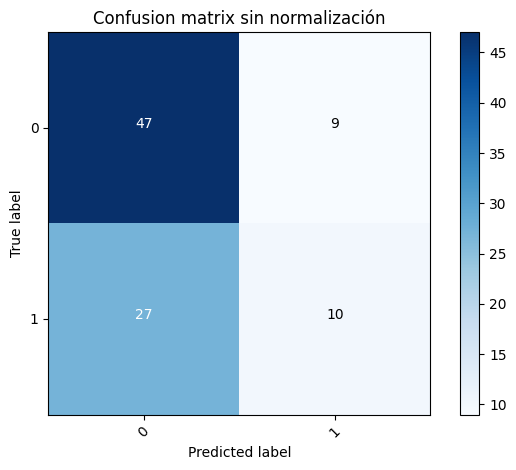

In [193]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases, title='Confusion matrix sin normalización')

In [194]:
clases = ['Sin chd', 'Con chd']

# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, prediccion_lab)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, prediccion_lab, target_names=clases)
print("\nClassification Report:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, prediccion_lab)
print("\nAccuracy:\n", accuracy)


"""Confusion Matrix:
 [[43 13]
 [17 20]]

Classification Report:
               precision    recall  f1-score   support

     Sin chd       0.72      0.77      0.74        56
     Con chd       0.61      0.54      0.57        37

    accuracy                           0.68        93
   macro avg       0.66      0.65      0.66        93
weighted avg       0.67      0.68      0.67        93


Accuracy:
 0.6774193548387096"""

Confusion Matrix:
 [[47  9]
 [27 10]]

Classification Report:
               precision    recall  f1-score   support

     Sin chd       0.64      0.84      0.72        56
     Con chd       0.53      0.27      0.36        37

    accuracy                           0.61        93
   macro avg       0.58      0.55      0.54        93
weighted avg       0.59      0.61      0.58        93


Accuracy:
 0.6129032258064516


'Confusion Matrix:\n [[43 13]\n [17 20]]\n\nClassification Report:\n               precision    recall  f1-score   support\n\n     Sin chd       0.72      0.77      0.74        56\n     Con chd       0.61      0.54      0.57        37\n\n    accuracy                           0.68        93\n   macro avg       0.66      0.65      0.66        93\nweighted avg       0.67      0.68      0.67        93\n\n\nAccuracy:\n 0.6774193548387096'